# Project 4 - Vehicle Detection

In [12]:
# import libaries
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

import numpy as np
import cv2
import matplotlib.pyplot as plt

print('Libraries Imported!')

Libraries Imported!


## Feature Extraction

### Functions

#### Spatial Binning

In [14]:
# Function from course work
def bin_spatial(img, color_space='BGR', size=(32, 32)):
    # Convert image to new color space (if specified)
    if color_space != 'BGR':
        if color_space == 'RGB':
            feature_image = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        elif color_space == 'HSV':
            feature_image = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
        elif color_space == 'LUV':
            feature_image = cv2.cvtColor(img, cv2.COLOR_BGR2LUV)
        elif color_space == 'HLS':
            feature_image = cv2.cvtColor(img, cv2.COLOR_BGR2HLS)
        elif color_space == 'YUV':
            feature_image = cv2.cvtColor(img, cv2.COLOR_BGR2YUV)
        elif color_space == 'YCrCb':
            feature_image = cv2.cvtColor(img, cv2.COLOR_BGR2YCrCb)
    else: feature_image = np.copy(img)             
    # Use cv2.resize().ravel() to create the feature vector
    features = cv2.resize(feature_image, size).ravel() 
    return features

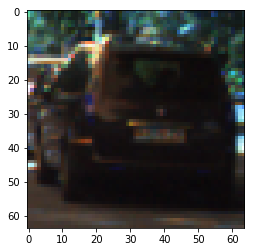

(64, 64, 3)
(3072,)


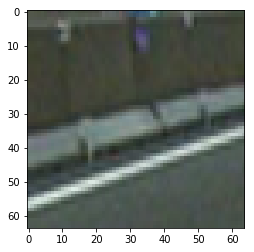

(64, 64, 3)
(3072,)
Image Size should be:  3072


In [17]:
# Test Spatial Binning
testImg_Car = cv2.imread('./images/vehicles/KITTI_extracted/345.png')
testImg_NotCar = cv2.imread('./images/non-vehicles/GTI/image1298.png')

plt.imshow(testImg_Car)
plt.show()
print(testImg_Car.shape)
newImg = bin_spatial(testImg_Car)
print(newImg.shape)
plt.imshow(testImg_NotCar)
plt.show()
print(testImg_NotCar.shape)
newImg = bin_spatial(testImg_NotCar)
print(newImg.shape)
print('Image Size should be: ', 32*32*3)

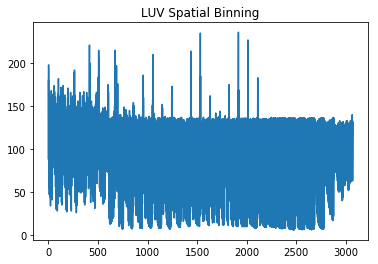

In [23]:
# interact with spatial binning
def fBinning(colorSpace):
    featureVec = bin_spatial(testImg_Car, colorSpace)
    plt.plot(featureVec)
    plt.title(colorSpace + ' Spatial Binning')
    plt.show()

interact(fBinning, colorSpace={'HSV':'HSV', 'LUV':'LUV','HLS':'HLS','YUV':'YUV','YCrCb':'YCrCb'})